In [ ]:
#1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
#2.) Did having a family member increase the odds of surviving the crash?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
%matplotlib inline
titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


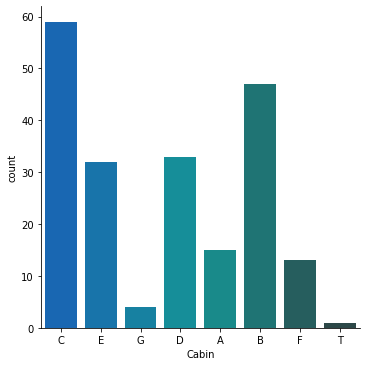

In [2]:
#(1)
deck = titanic_df['Cabin'].dropna()
levels = []
for level in deck:
    levels.append(level[0])  
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin',data=cabin_df,palette='winter_d',kind='count')

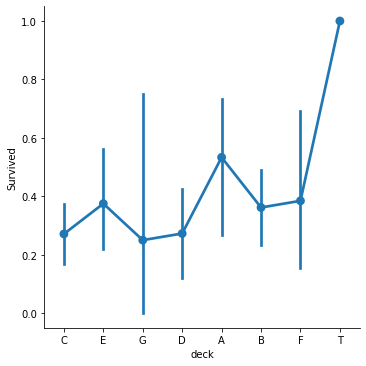

In [3]:
titanic_df['deck']=DataFrame(levels)
sns.catplot(x='deck',y='Survived',kind='point',data=titanic_df)

In [4]:
#Comment:
#While data of deck T is dropped since it's lack of sample, all deck have a silmilar data for survival rate of 
#about 0.3 to 0.4, except for deck A, having over 0.5.

In [5]:
#(2)
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Users/seanlyw613/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


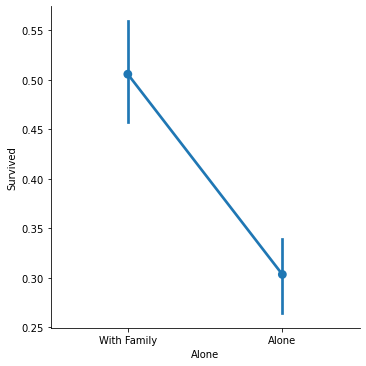

In [6]:
#Comment:
sns.catplot(x='Alone',y='Survived',kind='point',data=titanic_df)
#Having a family member increases the odd of living from ~0.3 to ~0.5.